## Part 1

In [1]:
import re
from nltk.tokenize import RegexpTokenizer
import spacy
import pandas as pd
from collections import Counter
import pickle

### 1.1. First, tokenize the sentence yourself (i.e. manually convert this string toa list of tokens) without looking at any of the methods in the manual.Then, use at least two different (computational) methods for tokenization. Compare the results: describe the differences and try to explain them given what you know about the way they work

In [2]:
sample = 'We’re where we were when W.W.W. Wonka (1940-2012) was when he was selected prime minister of the U.K. with 50.23% of the votes. For more information, see: www.we-want-wonka.co.uk/2012'
punctuation = re.compile(r'[!"#$%&\'\(\)\*\+\,\-\.\/:\;\<=\>\?@\[\\\]\^\_`\{|\}~]')

# No methods used
def tokenize(text):
    punctuation.sub(text, '')
    text = text.lower() 
    text = text.split()
    return text

result1 = tokenize(sample)

# NLTK method
tokenizer = RegexpTokenizer('\w+')
result2 = tokenizer.tokenize(sample.lower())

# Spacy method
nlp = spacy.load("en_core_web_sm")
processed_text = nlp(sample.lower())

result3 = [token.text for token in processed_text if not token.is_punct]

Put together, the different tokens lists look like this.

In [3]:
pd.DataFrame(data=[result1, result2, result3]).T

,0,1,2
0,we’re,we,we
1,where,re,’re
2,we,where,where
3,were,we,we
4,when,were,were
5,w.w.w.,when,when
6,wonka,w,w.w.w
7,(1940-2012),w,wonka
8,was,w,1940
9,when,wonka,2012


Differences:

- result1 splits on any of the characters included in the punctuation list.

- result2 splits the sample text in sequences that match the indicated pattern '\w+' (sequence of word characters). It is equivalent to the method 'findall' from the re library.

- result3 is the library spaCy particular method of tokenization. It adds some special cases to the standard tokenization. For example, it seems to retrieve the full value of numbers that have a decimal part (50.23), or abbreviations separated by periods (U.K). Also, it retrieves full links to websites.

### 1.2. In 2017, a medium article compared the word counts of four different tools (Word, Word Online, Google Docs, LibreOffice). All tools produced different word counts. The author concluded: ’I’m not counting manually to find out who is correct, so I am declaring them all rubbish’.

### Inspect the lengths of texts based on the different tokenization methods from question 1

In [4]:
print(f"Total number of tokens obtained with custom tokenize function: {len(result1)}")
print(f"Total number of tokens obtained with RegexpTokenizer: {len(result2)}")
print(f"Total number of tokens obtained with spaCy tokenizer: {len(result3)}")

Total number of tokens obtained with custom tokenize function: 28
Total number of tokens obtained with RegexpTokenizer: 40
Total number of tokens obtained with spaCy tokenizer: 30


Since the tokens obtained with spaCy seem the most reliable to me, I would say that the most appropriate length is 30 words.

### 1.3. Compare the occurrences of the words ’we’, ’www’ between tokenization methods.

Custom tokenize function retrieves: {"we’re"}, {"w.w.w"}

RegexpTokenizer retrieves: {"we", "re"}, {"w", "w", "w"}

spaCy tokenizer retrieves: {"we", "’re"}, {"w.w.w"}

### 1.4. Compare the ten most frequent words based on the different (including your own) tokenization methods. Do you think these differences will matter when you have millions of texts, and not some nonsense text solely designed to make you reflect on the impact of preprocessing methods?

In [5]:
counter_1 = Counter(result1)
counter_2 = Counter(result2)
counter_3 = Counter(result3)

counter_1.most_common(5), counter_2.most_common(5), counter_3.most_common(5)

([('when', 2), ('was', 2), ('of', 2), ('the', 2), ('we’re', 1)],
 [('we', 3), ('w', 3), ('when', 2), ('wonka', 2), ('2012', 2)],
 [('we', 2), ('when', 2), ('was', 2), ('of', 2), ('the', 2)])

If the difference is so substantial in such a small text, it is very likely that they will matter in bigger samples.

## Part 2

In [6]:
# Load pickle file
df = pd.read_pickle(r'discussions.p')

### How many posts of each television show are in the dataset? And how many of each year?

In [7]:
df.title.value_counts()

Game of Thrones            15462
Breaking Bad                6424
Better Call Saul            5268
Black Mirror                4720
Stranger Things             2891
True Detective              2721
Twin Peaks                  2399
Dark                        2004
Ozark                       1417
Mr. Robot                   1347
Orange is the New Black     1208
The Witcher                 1188
Fargo                        680
Mindhunter                   657
The Newsroom                 484
Succession                   389
The Crown                    338
House of Cards               158
La Casa de Papel             150
The Mandelorian               95
Name: title, dtype: int64

In [8]:
df.year.value_counts()

2017    12830
2016     7734
2015     7118
2019     6608
2018     4332
2020     3851
2012     3342
2013     2758
2014      839
2011      588
Name: year, dtype: int64

### Process the posts using Spacy. What are the ten most frequent lemmatized nouns? And what are the most frequent lemmatized adjectives?

In [9]:
from tqdm.notebook import tqdm 

processed_texts = [text for text in tqdm(nlp.pipe(df.post, 
                                              n_process=-1, # maximum number of threads
                                              disable=["ner",
                                                       "parser"]),
                                          total=len(df.post))]

In [10]:
df['processed_texts'] = processed_texts

In [11]:
flatten = lambda t: [item for sublist in t for item in sublist]

nouns = [[word.lemma_ for word in text if word.pos_ == 'NOUN'] for text in processed_texts]
adjectives = [[word.lemma_ for word in text if word.pos_ == 'ADJ'] for text in processed_texts]

In [12]:
# 10 most common nouns
Counter(flatten(nouns)).most_common()[:10]

[('episode', 5243),
 ('season', 3003),
 ('time', 2913),
 ('show', 2700),
 ('thing', 2625),
 ('people', 2370),
 ('scene', 2237),
 ('way', 2186),
 ('character', 1865),
 ('guy', 1598)]

In [13]:
# 10 most common adjectives
Counter(flatten(adjectives)).most_common()[:10]

[('good', 2581),
 ('other', 1611),
 ('bad', 1529),
 ('same', 1527),
 ('more', 1421),
 ('first', 1275),
 ('last', 1133),
 ('whole', 1086),
 ('great', 1042),
 ('sure', 1015)]

### Choose two titles you think make for an interesting comparison. This could be titles of shows you’ve seen, but that isn’t necessary. Now, make a subset of the dataset only including discussion on the first title. What are the twenty most frequent adjectives?

In [14]:
df.head()

,title,type,year,post,processed_texts
0,Better Call Saul,linear,2017,Walter. And there the chain ends.,"(Walter, ., And, there, the, chain, ends, .)"
1,Better Call Saul,linear,2016,I love this show. But it's hard to argue again...,"(I, love, this, show, ., But, it, 's, hard, to..."
2,Better Call Saul,linear,2017,What am I missing? A lot of reference to ribs...,"(What, am, I, missing, ?, , A, lot, of, refer..."
3,Better Call Saul,linear,2018,"Oh come on Mike, he's a good little boy.","(Oh, come, on, Mike, ,, he, 's, a, good, littl..."
4,Better Call Saul,linear,2017,Look again 👀,"(Look, again, 👀)"


#### Adjectives

In [15]:
bb_posts = df[df.title == 'Breaking Bad']
adj_bb = [[word.lemma_ for word in text if word.pos_ == 'ADJ'] for text in bb_posts.processed_texts]
Counter(flatten(adj_bb)).most_common()[:10]

[('good', 206),
 ('bad', 138),
 ('last', 124),
 ('first', 107),
 ('much', 98),
 ('sure', 97),
 ('more', 96),
 ('same', 94),
 ('next', 86),
 ('other', 85)]

In [16]:
bcs_posts = df[df.title == 'Better Call Saul']
adj_bcs = [[word.lemma_ for word in text if word.pos_ == 'ADJ'] for text in bcs_posts.processed_texts]
Counter(flatten(adj_bcs)).most_common()[:10]

[('good', 321),
 ('bad', 222),
 ('other', 189),
 ('same', 183),
 ('more', 170),
 ('first', 166),
 ('great', 139),
 ('right', 133),
 ('much', 118),
 ('sure', 116)]

#### Nouns

In [17]:
nouns_bb = [[word.lemma_ for word in text if word.pos_ == 'NOUN'] for text in bb_posts.processed_texts]
Counter(flatten(nouns_bb)).most_common()[:10]

[('episode', 403),
 ('time', 230),
 ('show', 221),
 ('season', 219),
 ('scene', 201),
 ('way', 194),
 ('guy', 189),
 ('thing', 187),
 ('money', 181),
 ('shit', 157)]

In [18]:
nouns_bcs = [[word.lemma_ for word in text if word.pos_ == 'NOUN'] for text in bcs_posts.processed_texts]
Counter(flatten(nouns_bcs)).most_common()[:10]

[('episode', 478),
 ('show', 340),
 ('time', 312),
 ('thing', 309),
 ('scene', 294),
 ('way', 292),
 ('guy', 292),
 ('season', 267),
 ('people', 242),
 ('character', 187)]

#### Compare the most frequent nouns between posts from 2011 and posts from 2020. Do you see any notable differences? If so, track the normalized frequencies of those words throughout the years.

In [19]:
posts_11 = df[df.year == 2011]
nouns_11 = [[word.lemma_ for word in text if word.pos_ == 'NOUN'] for text in posts_11.processed_texts]
Counter(flatten(nouns_11)).most_common()[:10]

[('episode', 43),
 ('scene', 35),
 ('time', 31),
 ('season', 30),
 ('thing', 29),
 ('show', 26),
 ('car', 21),
 ('way', 19),
 ('guy', 18),
 ('year', 17)]

In [20]:
posts_20 = df[df.year == 2020]
nouns_20 = [[word.lemma_ for word in text if word.pos_ == 'NOUN'] for text in posts_20.processed_texts]
Counter(flatten(nouns_20)).most_common()[:10]

[('episode', 370),
 ('time', 338),
 ('season', 326),
 ('world', 319),
 ('show', 270),
 ('thing', 234),
 ('way', 203),
 ('scene', 197),
 ('character', 181),
 ('people', 156)]

In [21]:
# Let's check what uncommon nouns there are and if there are, which ones are the most frequent in each document

nouns_str_11 = [word for word, num in Counter(flatten(nouns_11)).most_common()[:10]]
nouns_str_20 = [word for word, num in Counter(flatten(nouns_20)).most_common()[:10]]
common_nouns = [w for w in nouns_str_11 if w in nouns_str_20]
uncommon_nouns = [(w, n, '2020') for w, n in Counter(flatten(nouns_20)).most_common()[:10] if w not in common_nouns]
uncommon_nouns.extend([(w, n, '2011') for w, n in Counter(flatten(nouns_11)).most_common()[:10] if w not in common_nouns])

In [22]:
uncommon_nouns

[('world', 319, '2020'),
 ('character', 181, '2020'),
 ('people', 156, '2020'),
 ('car', 21, '2011'),
 ('guy', 18, '2011'),
 ('year', 17, '2011')]

<AxesSubplot:xlabel='year'>

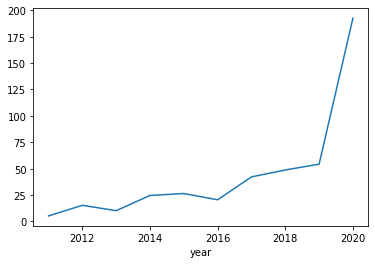

In [23]:
# World is the most used term in 2020 that wasn't used in 2011. Car is the most used term in 2011 that wasn't used in 2020. Let's investigate those two!

nouns = [[word.lemma_ for word in text if word.pos_ == 'NOUN'] for text in df.processed_texts]

df['nouns'] = nouns
df['count'] = df.nouns.apply(lambda x: x.count('world'))
df['total'] = df.nouns.apply(len)

grouped = df.groupby('year').sum()
grouped['normalized_freq'] = grouped['count'] * 10000 / grouped['total']

grouped.normalized_freq.plot() # plot the normalized frequency

<AxesSubplot:xlabel='year'>

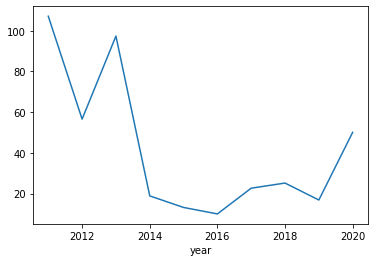

In [24]:
df['count'] = df.nouns.apply(lambda x: x.count('car'))
df['total'] = df.nouns.apply(len)

grouped = df.groupby('year').sum()
grouped['normalized_freq'] = grouped['count'] * 10000 / grouped['total']

grouped.normalized_freq.plot() # plot the normalized frequency

### Track the normalized frequency of the lemmas netflix, binge, original, cliffhanger and television through the years. What can you conclude?

<AxesSubplot:xlabel='year'>

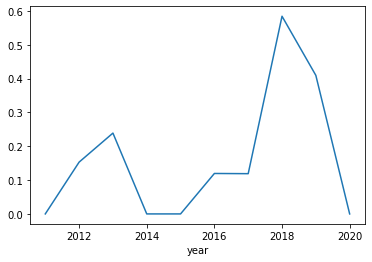

In [25]:
lemmatized_texts = [[word.lemma_ for word in text if not word.is_punct] for text in df.processed_texts] 

df['lemmatized_texts'] = lemmatized_texts
df['count'] = df.lemmatized_texts.apply(lambda x: x.count('netflix'))
df['total'] = df.lemmatized_texts.apply(len)

grouped = df.groupby('year').sum()
grouped['normalized_freq'] = grouped['count'] * 10000 / grouped['total']

grouped.normalized_freq.plot() # plot the normalized frequency

<AxesSubplot:xlabel='year'>

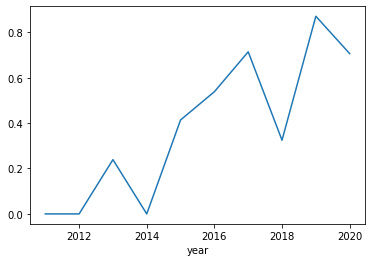

In [26]:
df['count'] = df.lemmatized_texts.apply(lambda x: x.count('binge'))

grouped = df.groupby('year').sum()
grouped['normalized_freq'] = grouped['count'] * 10000 / grouped['total']

grouped.normalized_freq.plot() # plot the normalized frequency

<AxesSubplot:xlabel='year'>

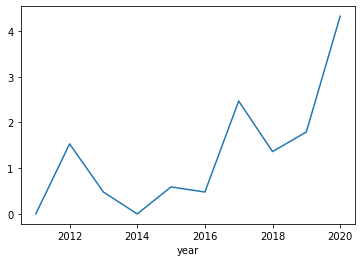

In [27]:
df['count'] = df.lemmatized_texts.apply(lambda x: x.count('original'))

grouped = df.groupby('year').sum()
grouped['normalized_freq'] = grouped['count'] * 10000 / grouped['total']

grouped.normalized_freq.plot() # plot the normalized frequency

<AxesSubplot:xlabel='year'>

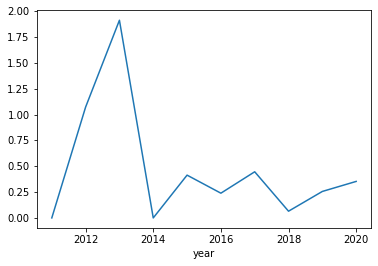

In [28]:
df['count'] = df.lemmatized_texts.apply(lambda x: x.count('cliffhanger'))

grouped = df.groupby('year').sum()
grouped['normalized_freq'] = grouped['count'] * 10000 / grouped['total']

grouped.normalized_freq.plot() # plot the normalized frequency

<AxesSubplot:xlabel='year'>

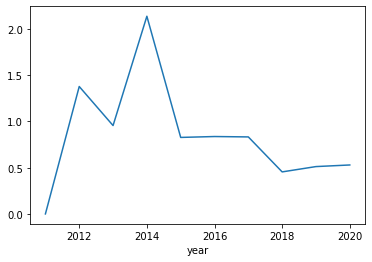

In [29]:
df['count'] = df.lemmatized_texts.apply(lambda x: x.count('television'))

grouped = df.groupby('year').sum()
grouped['normalized_freq'] = grouped['count'] * 10000 / grouped['total']

grouped.normalized_freq.plot() # plot the normalized frequency